In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

In [19]:
df =pd.read_csv('Advertising.csv')
 

In [20]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [21]:
df.info

<bound method DataFrame.info of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [27]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

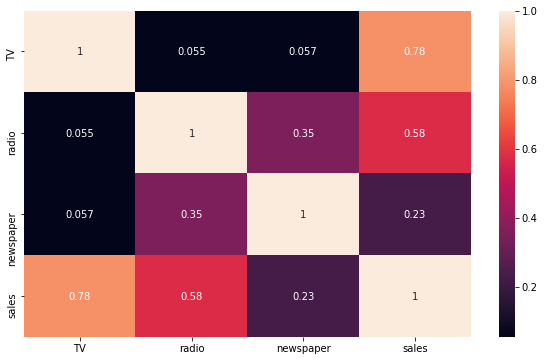

In [28]:
sns.heatmap(df.corr(),annot = True)

## Create new independent variable (feature)

In [30]:
df['Total_spend'] = df.TV + df.radio + df.newspaper

In [31]:
df['Total_spend']

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: Total_spend, Length: 200, dtype: float64

In [32]:
df.describe()

,TV,radio,newspaper,sales,Total_spend
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500,200.860500
std,85.854236,14.846809,21.778621,5.217457,92.985181
min,0.700000,0.000000,0.300000,1.600000,11.700000
25%,74.375000,9.975000,12.750000,10.375000,123.550000
50%,149.750000,22.900000,25.750000,12.900000,207.350000
75%,218.825000,36.525000,45.100000,17.400000,281.125000
max,296.400000,49.600000,114.000000,27.000000,433.600000


In [33]:
df.head()

,TV,radio,newspaper,sales,Total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


## Which feature is more suitable for linear regression?

In [34]:
def plot_relation(df, target_var):
    num_cols = df.columns
    for col in num_cols:
        if col != target_var:
            plt.figure()
            sns.lmplot(x=col, y=target_var, data=df, height=7)
            plt.xlabel(f"variable name: {col}")
            plt.ylabel("Sales")

<Figure size 720x432 with 0 Axes>

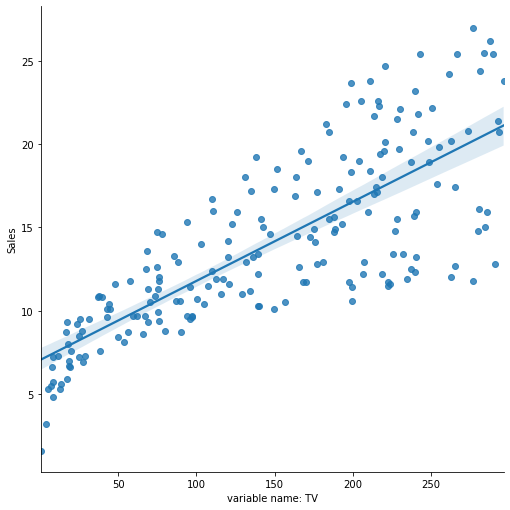

<Figure size 720x432 with 0 Axes>

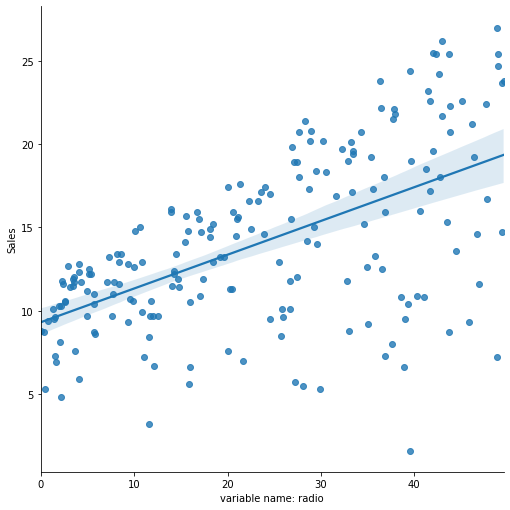

<Figure size 720x432 with 0 Axes>

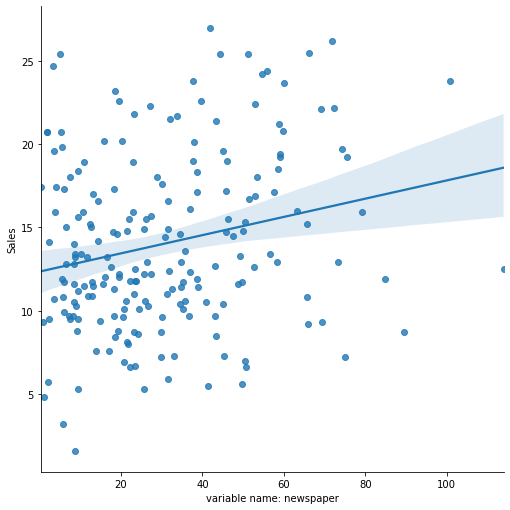

<Figure size 720x432 with 0 Axes>

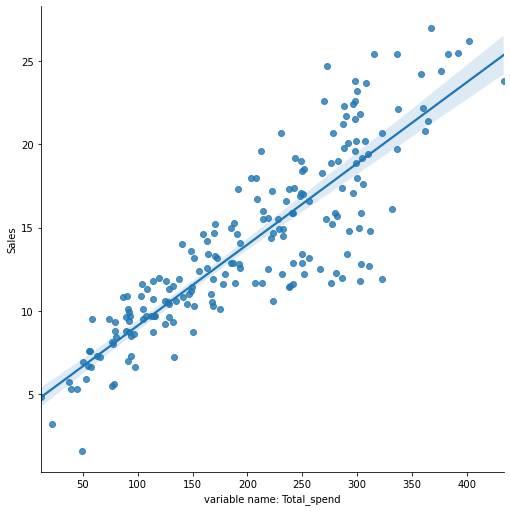

In [37]:
plot_relation(df,'sales')


In [ ]:
# shadow is a Confidens Interval

## Which feature is more suitable for linear regression?

In [38]:
def check_dist(df, var):
    plt.figure(figsize =(10,6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

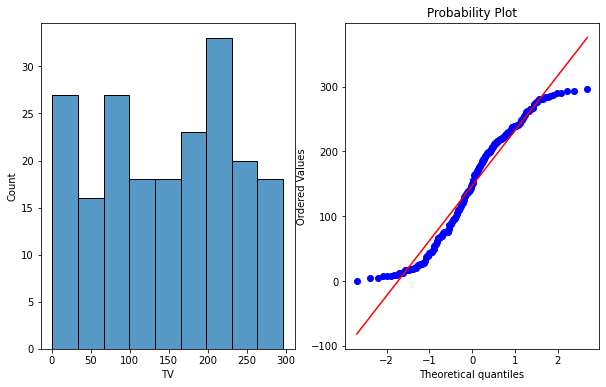

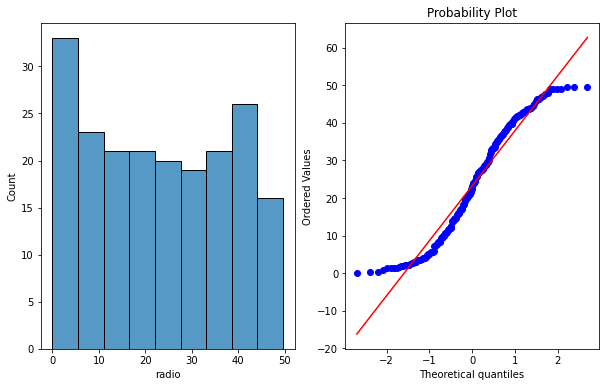

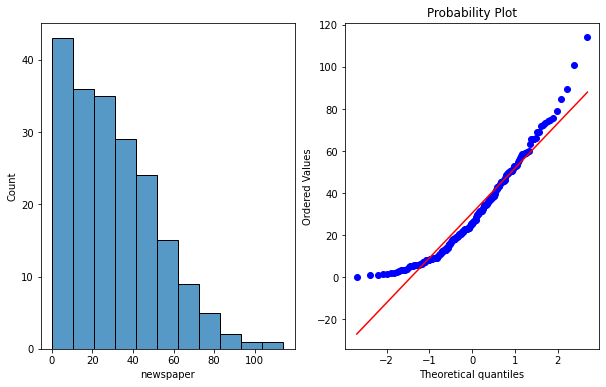

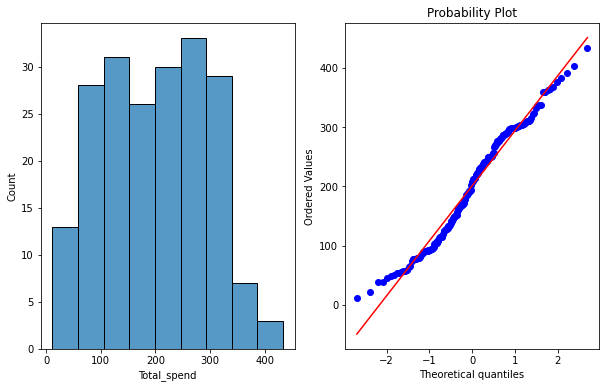

In [39]:
for col in df.drop("sales", axis=1).columns:
    check_dist(df, col)

In [46]:
df = df[["Total_spend", "sales"]]
df.head()

,Total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


## Plotting the relationship between independent variable and dependent variable 


<AxesSubplot:xlabel='Total_spend', ylabel='sales'>

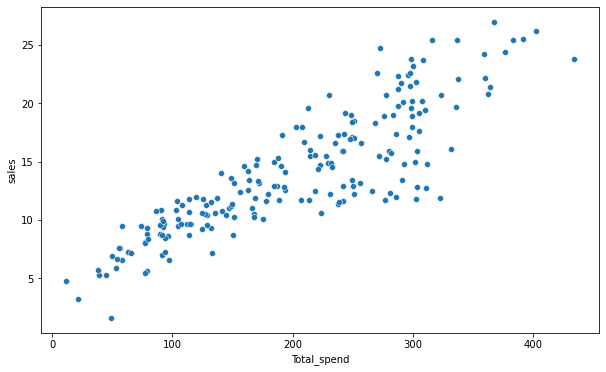

In [48]:
sns.scatterplot(x = "Total_spend", y = "sales", data = df)

## Correlation between independent variable and dependent variable

In [49]:
corr = df.sales.corr(df.Total_spend)

In [50]:
corr

0.8677123027017427

## Coefficient of determination (R2)


In [52]:
R2_score = corr**2
R2_score

0.7529246402599608

<AxesSubplot:xlabel='Total_spend', ylabel='sales'>

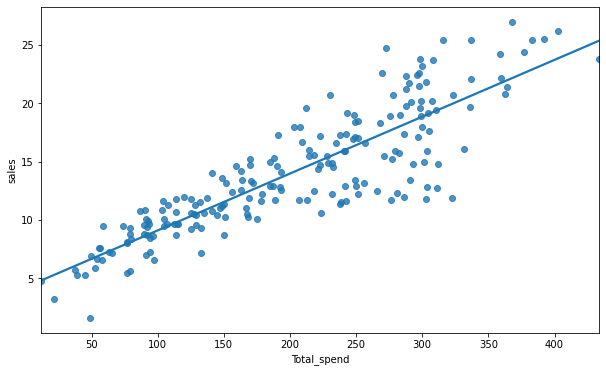

In [53]:
sns.regplot(x = "Total_spend", y = "sales", data = df, ci = None)# best line

## Splitting the dataset into X(independent variables) and y (dependent variable)

In [ ]:
# y = mX + b

In [55]:
X = df.Total_spend
y = df.sales

## Determination of coefficients (slope and intercept)


In [56]:
np.polyfit(X, y, deg = 1)

array([0.04868788, 4.24302822])

## Why do we use the least squares error method to find the regression line that best fits the data?

In [57]:
m= np.polyfit(X, y, deg = 1)[0]
b = np.polyfit(X, y, deg = 1)[1]

predict = m*X + b

In [58]:
values = {"actual": y, "predicted": predict, "residual": y-predict, "LSE": (y-predict)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [59]:
df_2.residual.sum().round()  # cheking which one is the best line

0.0

In [60]:
df_2.LSE.sum()

1338.4439761715594

## Prediction with simple linear regression

In [61]:
potential_spend = np.linspace(0, 500, 100)
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [62]:
predicted_sales_lin = m * potential_spend + b
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

<AxesSubplot:xlabel='Total_spend', ylabel='sales'>

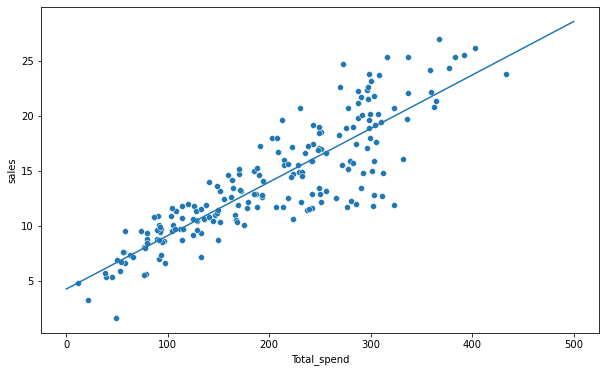

In [63]:
plt.plot(potential_spend, predicted_sales_lin)
sns.scatterplot(x='Total_spend',y='sales',data=df)